# Load and check data

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
comments = pd.read_csv("UScomments.csv", error_bad_lines=False)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_22068\1551390514.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  comments = pd.read_csv("UScomments.csv", error_bad_lines=False)
b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_22068\1551390514.py:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  comments = pd.read_csv("UScomments.csv", error_bad_lines=False)


In [7]:
comments.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [8]:
comments.isna().sum()

video_id         0
comment_text    25
likes            0
replies          0
dtype: int64

- Trường 'comment_text' có các giá trị null -> Loại bỏ

In [9]:
## drop missing values as we have very few & update dataframe as well..
comments.dropna(inplace=True)

In [10]:
comments.isna().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

## 1. Perform Sentiment Analysis

#### Sentiment Analysis using textblob

In [11]:
!pip install textblob

In [12]:
from textblob import TextBlob

In [13]:
# Vì kích thước mẫu lớn nên chỉ lấy sample để tiến hành phân tích
sample = comments.loc[0:1000, :].copy()

In [14]:
polarity=[]
for comment in sample['comment_text']:
    try:
        polarity.append(TextBlob(comment).sentiment.polarity)
    except:
        polarity.append(0)

sample['polarity']=polarity

sample['polarity'].sum()

130.79359586415706

- Trong mẫu 1000 comment đạt polarity score 130 cho thấy phản ứng tích cực của khán giả về nội dung YouTubeVideo

#### Sentiment analysis using NLTK Vader SentimentAnalyzer..

In [15]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [16]:
from nltk.sentiment import SentimentIntensityAnalyzer

polarities=[]
for text in sample['comment_text']:
    polarities.append(SentimentIntensityAnalyzer().polarity_scores(text)['compound'])

### summing up all the values of list
sum(polarities)    

111.41629999999995

- Trong mẫu 1000 comment đạt compound score 111 cho thấy phản ứng tích cực của khán giả về nội dung YouTubeVideo

## 2. Wordcloud Analysis of your data

### Perform EDA for the Positve and Negative sentences

In [40]:
polarity = []

for text in comments['comment_text']:
    try:
        polarity.append(TextBlob(text).sentiment.polarity)
    except:
        polarity.append(0)

comments['polarity'] = polarity

In [19]:
comments_positive = comments[comments['polarity'] == 1]

In [20]:
comments_negative = comments[comments['polarity'] == -1]

In [21]:
comments_negative.shape

(3508, 5)

In [22]:
from wordcloud import WordCloud , STOPWORDS

In [23]:
comments_negative['comment_text']

512       BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...
562       Well… The brain surgeon Ben Carson just proved...
952              WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!
1371                                         WTF BRUH!!!!!!
1391                        cheeseus christ thats insane!!!
                                ...                        
690788                                  Like Kelly she evil
690865                       R U FUCKING KIDDING ME?!?!?!?!
691073             This is horribly offensive please report
691180    Sink holes looks terrifying sinkholes sink you...
691224    Trump talked to the president of US Virgin Isl...
Name: comment_text, Length: 3508, dtype: object

In [27]:
total_negative_comments =' '.join(comments_negative['comment_text'])

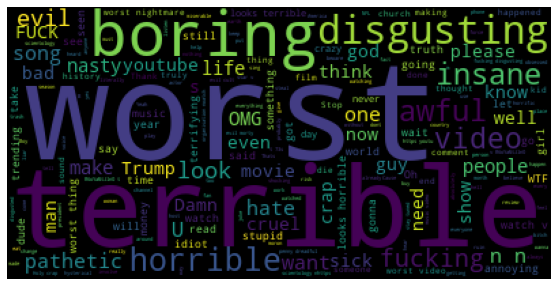

In [26]:
wordcloud = WordCloud(stopwords = set(STOPWORDS)).generate(total_negative_comments)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

plt.show()

- Người dùng có xu hướng sử dụng các từ như Terrible , worst ,horrible ,boring , disgusting etc.. để thể hiện thái độ tiêu cực

In [29]:
total_positive_comments=' '.join(comments_positive['comment_text'])

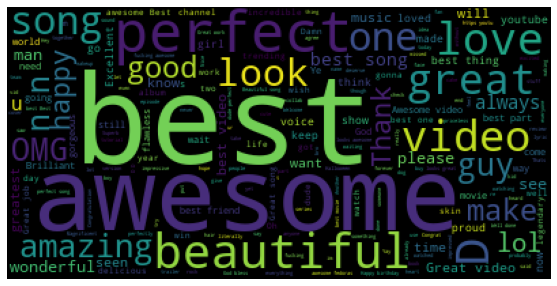

In [35]:
wordcloud=WordCloud(stopwords=set(STOPWORDS)).generate(total_positive_comments)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

plt.show()

- Người dùng có xu hướng sử dụng các từ như best, awesome, perfect, great, look, etc.. để thể hiện thái độ tiêu cực

## 3. Perform Emoji's Analysis

### Extract emoji from comments

In [79]:
!pip install emoji

In [80]:
import emoji

In [81]:
comments.head(14)

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.000000
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.000000
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.000000
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.000000
4,XpVt6Z1Gjjo,trending 😉,3,0,0.000000
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0,0.000000
6,XpVt6Z1Gjjo,The end though 😭👍🏻❤️,4,0,0.000000
7,XpVt6Z1Gjjo,#1 trending!!!!!!!!!,3,0,0.000000
8,XpVt6Z1Gjjo,Happy one year vlogaversary,3,0,0.800000
9,XpVt6Z1Gjjo,You and your shit brother may have single hand...,0,0,-0.135714


In [65]:
### extract emoji from comments

emoji_list=[]
for comment in comments['comment_text']:
    for char in comment:
        if emoji.is_emoji(char) == True:
            emoji_list.append(char)

### Compute frequencies of top10 emojis..

In [82]:
from collections import Counter

In [66]:
Counter(emoji_list).most_common(10)

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147)]

In [69]:
top10_emojis=[Counter(emoji_list).most_common(10)[i][0] for i in range(10)]

In [70]:
top10_emojis

['😂', '😍', '❤', '🔥', '😭', '👏', '😘', '👍', '💖', '💕']

In [71]:
freqs=[Counter(emoji_list).most_common(10)[i][1] for i in range(10)]

In [74]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [76]:
top_emoji_chart = go.Bar(x=top10_emojis,y=freqs)

In [78]:
iplot([top_emoji_chart])

## 4. Which Category has the maximum likes ?

### get full df from additional file

In [97]:
import os

path=r'additional_data'
files=os.listdir(path)

files_csv=[files[i] for i in range(0,len(files),2)]

In [98]:
full_df=pd.DataFrame()

for file in files_csv:
    current_df=pd.read_csv(path+'/'+file,encoding='iso-8859-1',error_bad_lines=False)
    
    current_df['country']=file.split('.')[0][0:2]
    full_df=pd.concat([full_df,current_df])
    

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_22068\13309659.py:4: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.



C:\Users\ADMIN\AppData\Local\Temp\ipykernel_22068\13309659.py:4: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.



C:\Users\ADMIN\AppData\Local\Temp\ipykernel_22068\13309659.py:4: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.



C:\Users\ADMIN\AppData\Local\Temp\ipykernel_22068\13309659.py:4: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.



C:\Users\ADMIN\AppData\Local\Temp\ipykernel_22068\13309659.py:4: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version. Use o

In [99]:
full_df['category_id'].unique()

array([10, 23, 24, 25, 22, 26,  1, 28, 20, 17, 29, 15, 19,  2, 27, 43, 30,
       44], dtype=int64)

In [135]:
vid_category = pd.read_csv('category_file.txt',sep=':')

In [138]:
vid_category.reset_index(inplace= True)

In [139]:
vid_category.columns = ['category_id', 'category_name']

In [141]:
vid_category.head()

,category_id,category_name
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports


In [143]:
dct=vid_category.to_dict()

In [145]:
dct['category_name']

{0: ' Film & Animation',
 1: ' Autos & Vehicles',
 2: ' Music',
 3: ' Pets & Animals',
 4: ' Sports',
 5: ' Short Movies',
 6: ' Travel & Events',
 7: ' Gaming',
 8: ' Videoblogging',
 9: ' People & Blogs',
 10: ' Comedy',
 11: ' Entertainment',
 12: ' News & Politics',
 13: ' Howto & Style',
 14: ' Education',
 15: ' Science & Technology',
 16: ' Nonprofits & Activism',
 17: ' Movies',
 18: ' Anime/Animation',
 19: ' Action/Adventure',
 20: ' Classics',
 21: ' Comedy',
 22: ' Documentary',
 23: ' Drama',
 24: ' Family',
 25: ' Foreign',
 26: ' Horror',
 27: ' Sci-Fi/Fantasy',
 28: ' Thriller',
 29: ' Shorts',
 30: ' Shows',
 31: ' Trailers            '}

In [148]:
full_df['category_name'] = full_df['category_id'].map(dct['category_name'])

In [201]:
category_list_in_ordered = full_df.groupby('category_name')['likes'].median()\
                                                                    .reset_index()\
                                                                    .sort_values('likes',ascending = False)['category_name'].tolist()

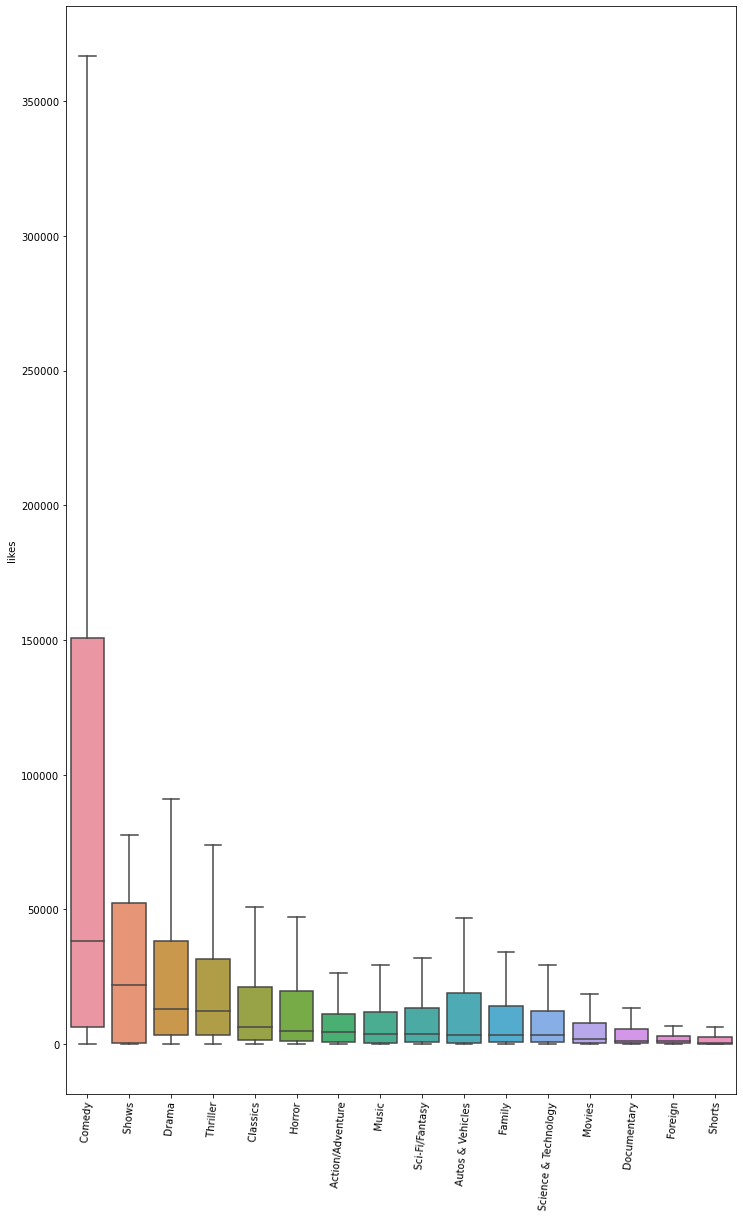

In [208]:
fig, ax = plt.subplots(figsize=(12,20))

sns.boxplot(
    x='category_name',
    y='likes',
    showfliers = False,
    order = category_list_in_ordered,
    data=full_df)

plt.xticks(rotation = 85)
plt.xlabel("")

plt.show()

- Thể loại comedy là thể loại có median cao nhất. Q3 trải dài từ 50000 - 150000 lượt likes và Q4 từ 150k - 350k, là một điểm đột biến so với các thể loại video khác. Kể cả những video có median likes cũng cao hơn hẳn các thể loại còn lại

- Video shows mặc dù có median likes cao thứ hai nhưng lại có nhiều khả năng flop (Q2 trải rộng)

- Video Drama có median likes thấp hơn so với Shows nhưng có tiềm năng cao hơn Shows và mức độ an toàn cao hơn (Q2 hẹp hơn Q2 của shows)

- Các thể loại còn lại có median likes và mức độ biến động khá tương đồng nhau

## 5. Find out whether audience is engaged or not

In [190]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'country', 'category_name'],
      dtype='object')

In [191]:
full_df['like_rate']=(full_df['likes']/full_df['views'])*100
full_df['dislike_rate']=(full_df['dislikes']/full_df['views'])*100
full_df['comment_count_rate']=(full_df['comment_count']/full_df['views'])*100

In [209]:
category_list_in_ordered = full_df.groupby('category_name')['like_rate'].median()\
                                                                    .reset_index()\
                                                                    .sort_values('like_rate',ascending = False)['category_name'].tolist()

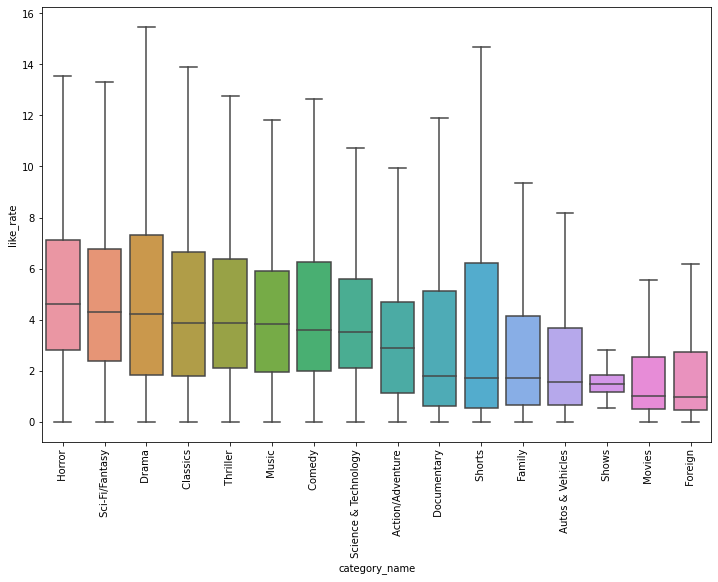

In [210]:
fig, ax = plt.subplots(figsize=(12,8))

sns.boxplot(
    x='category_name',
    y='like_rate',
    data=full_df,
    showfliers = False,
    order = category_list_in_ordered,
    ax = ax)

plt.xticks(rotation='vertical')

plt.show()

In [211]:
category_list_in_ordered = full_df.groupby('category_name')['dislike_rate'].median()\
                                                                    .reset_index()\
                                                                    .sort_values('dislike_rate',ascending = False)['category_name'].tolist()

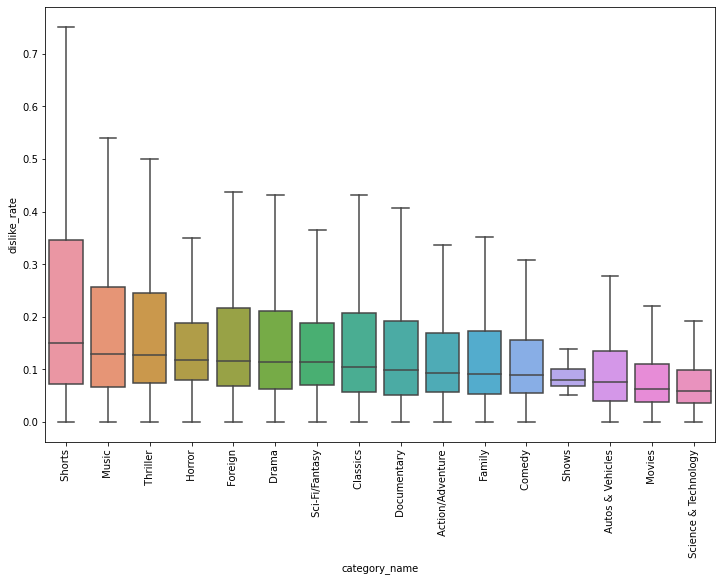

In [212]:
fig, ax = plt.subplots(figsize=(12,8))

sns.boxplot(
    x='category_name',
    y='dislike_rate',
    data=full_df,
    showfliers = False,
    order = category_list_in_ordered,
    ax = ax)

plt.xticks(rotation='vertical')

plt.show()

In [216]:
category_list_in_ordered = full_df.groupby('category_name')['comment_count_rate'].median()\
                                                                    .reset_index()\
                                                                    .sort_values('comment_count_rate',ascending = False)['category_name'].tolist()

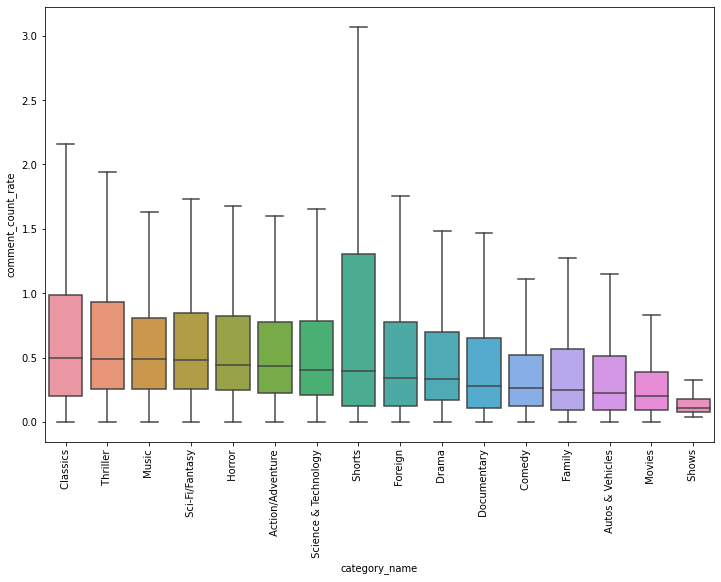

In [217]:
fig, ax = plt.subplots(figsize=(12,8))

sns.boxplot(
    x='category_name',
    y='comment_count_rate',
    data=full_df,
    showfliers = False,
    order = category_list_in_ordered,
    ax = ax)

plt.xticks(rotation='vertical')

plt.show()

<AxesSubplot:xlabel='views', ylabel='likes'>

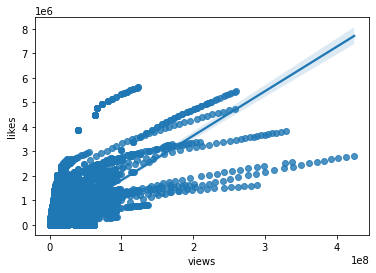

In [218]:
sns.regplot(data=full_df,
            x='views',
            y='likes')

In [ ]:
### finding co-relation values between ['views', 'likes', 'dislikes']

<AxesSubplot:>

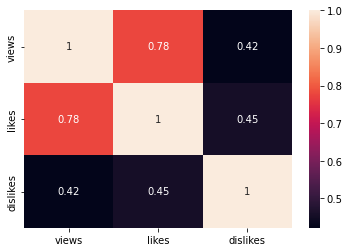

In [223]:
sns.heatmap(full_df[['views', 'likes', 'dislikes']].corr(),annot=True)

### Try it :
    Create scatterplot between 'views' & 'likes'

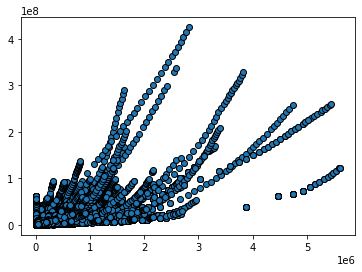

In [220]:
#### Create scatterplot between 'views' & 'likes'
plt.scatter(full_df['likes'],full_df['views'],edgecolors="#000000")

<AxesSubplot:xlabel='views', ylabel='likes'>

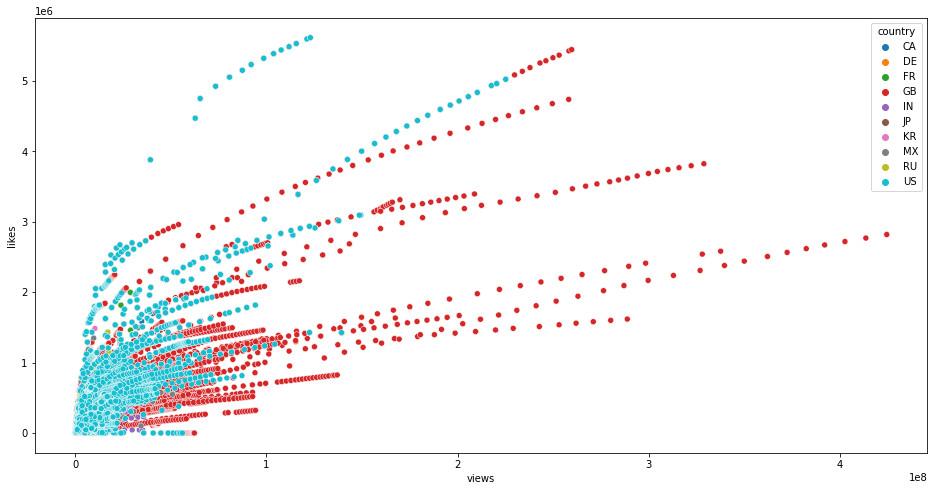

In [225]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=full_df["views"], y=full_df["likes"], hue=full_df["country"])

## 7..Which channels have the largest number of trending videos?

In [226]:
cdf=full_df.groupby('channel_title')['video_id'].count()\
                                                .sort_values(ascending=False)\
                                                .to_frame().reset_index()\
                                                .rename(columns={'video_id':'total_videos'})

In [230]:
cdf.head()

,channel_title,total_videos
0,The Late Show with Stephen Colbert,984
1,WWE,804
2,Late Night with Seth Meyers,773
3,VikatanTV,763
4,TheEllenShow,743


In [228]:
import plotly.express as px

In [229]:
px.bar(data_frame=cdf[0:20],x='channel_title',y='total_videos')

## 8..Does Punctuations in title and tags have any relation with views, likes, dislikes comments?

In [233]:
import string

In [234]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [235]:
def punc_count(x):
    return len([c for c in x if c in string.punctuation])

In [236]:
full_df['title'][0]

0          Eminem - Walk On Water (Audio) ft. BeyoncÃ©
0    Sing zu Ende! | Gesangseinlagen vom Feinsten |...
0             Malika LePen : Femme de Gauche - Trailer
0        John Lewis Christmas Ad 2017 - #MozTheMonster
0    Sharry Mann: Cute Munda ( Song Teaser) | Parmi...
0    é¸èªããªãåç´ã«è½ä¸ï¼è·¯ä¸ã®è»ã...
0             ì¢ì by ë¯¼ì_ì¤ì¢
ì _ì¢ë ëµê°
0                       CapÃ­tulo 12 | MasterChef 2017
0    ÐÐ°Ñ
Ð°Ñ Ð¸ ÐÐ¾Ð»Ð¸Ð½Ð° ÑÑÐ°ÑÑÑ ÑÐºÐ¾...
0                   WE WANT TO TALK ABOUT OUR MARRIAGE
Name: title, dtype: object

In [239]:
sample=full_df[0:10000]

In [240]:
sample['count_punc']=sample['title'].apply(punc_count)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_22068\1342546377.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [241]:
sample.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,comments_disabled,ratings_disabled,video_error_or_removed,description,country,category_name,like_rate,dislike_rate,comment_count_rate,count_punc
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,...,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA,Comedy,4.589104,0.253051,0.733639,4
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,...,False,False,False,STill got a lot of packages. Probably will las...,CA,Drama,12.594873,0.166363,1.284185,1
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,...,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,CA,Drama,4.575843,0.167292,0.256342,3
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,...,False,False,False,I know it's been a while since we did this sho...,CA,Family,6.309630,0.094903,0.835851,3
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,...,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,CA,Comedy,4.874563,0.062887,0.253752,3


<AxesSubplot:xlabel='count_punc', ylabel='views'>

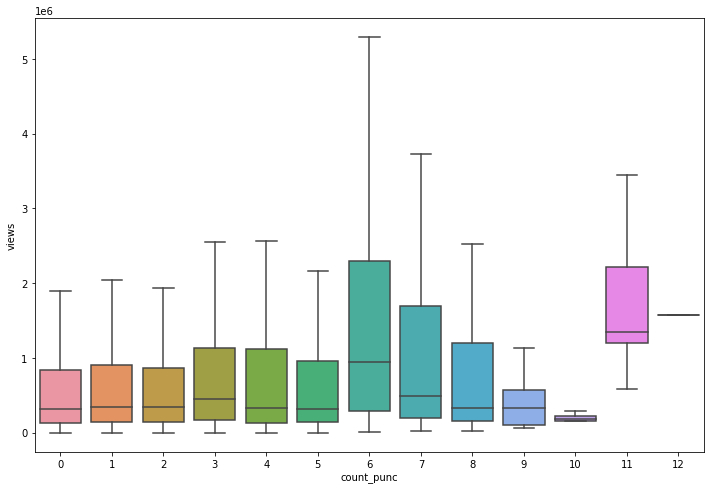

In [244]:
plt.figure(figsize=(12,8))

sns.boxplot(x= 'count_punc',
            y= 'views',
            showfliers = False,
            data= sample)

In [245]:
sample['count_punc'].corr(sample['views'])

0.06510009783044877

- Các kí tự đặc biệt không ảnh hưởng đến lượt xem của video